In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
# Reading the data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [4]:
df_train.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,40148966010272,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,37157708563676,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,47478049564374,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


**Dataset background:** The data is recorded by the inspection team. For preserving the identity, the values in categorical columns `Facility Name`, `City`, `State`, `GeoLoc` are encoded. There might be a case of human error.

In [5]:
df_train.shape

(147443, 15)

In [6]:
df_test.shape

(49148, 14)

#### Checking the cities and states available in training data

In [7]:
df_train['City'].unique().tolist()

['id-11235901', 'id-11275913']

In [8]:
df_train.groupby(['City', 'State'])['State'].count()

City         State     
id-11235901  id_1890134    147177
             id_1890135        19
id-11275913  id_1890134       225
             id_1890135        22
Name: State, dtype: int64

#### Checking the cities available in test data

In [9]:
df_test['City'].unique().tolist()

['id-11235901', 'id-11275913']

In [10]:
df_test.groupby(['City', 'State'])['State'].count()

City         State     
id-11235901  id_1890134    49057
             id_1890135        4
id-11275913  id_1890134       87
Name: State, dtype: int64

The data is collected from two cities i.e. `id-11235901` and `id-11275913`.

## EDA

### 1. Checking null entries and data type

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147443 non-null object
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 16.9+ MB


**Conclusion:**

1. The column `Date` has wrong data type

2. Column `Type`, `LocationID`, and `SectionViolations` has missing values

#### a. Proceeding with handling the data type of `Date`

In [12]:
temp_df = df_train.copy()
temp_df['Date'] = pd.to_datetime(temp_df['Date'], errors='coerce')

temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147390 non-null datetime64[ns]
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 16.9+ MB


In `Date` column some of the values are not converted to **datetime**.

In [13]:
temp_df[temp_df['Date'].isna()].head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
2834,14542503087757,NaT,22783,5173,4932,DAYCARE (2 - 6 YEARS),15570,id-11235901,id_1890134,81871.0,CANVASS,32.0,High,locid16453,4
6570,13144807998644,NaT,245,14302,13616,RESTAURANT,6693,id-11235901,id_1890134,81867.0,COMPLAINT RE-INSPECTION,NaN,High,locid9396,4
7261,14265186052801,NaT,35745,26486,25275,RESTAURANT,17061,id-11235901,id_1890134,81865.0,COMPLAINT,2.0,Medium,locid1366,5
7815,45339938455788,NaT,3991,17567,16781,RESTAURANT,16145,id-11235901,id_1890134,81876.0,CANVASS RE-INSPECTION,10.0,High,locid16661,1
8692,19021475613488,NaT,16056,5929,5670,RESTAURANT,13005,id-11235901,id_1890134,81875.0,LICENSE RE-INSPECTION,NaN,Low,locid14611,4


Some values are not converted to the respective date.

*One of the reason can be the invalid date was entered by the inspection team while storing the data.*

In [14]:
nat_indices = temp_df[temp_df['Date'].isna()].index

del temp_df

df_train.loc[nat_indices, 'Date'].unique()

array(['29-02-2011', '29-02-2015'], dtype=object)

In [15]:
# Replacing the above dates by valid date
df_train['Date'] = df_train['Date'].str.replace('29-02-2011', '28-02-2011')
df_train['Date'] = df_train['Date'].str.replace('29-02-2015', '28-02-2015')

df_train['Date'] = pd.to_datetime(df_train['Date'])

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
ID                    147443 non-null int64
Date                  147443 non-null datetime64[ns]
LicenseNo             147443 non-null int64
FacilityID            147443 non-null int64
FacilityName          147443 non-null int64
Type                  143958 non-null object
Street                147443 non-null int64
City                  147443 non-null object
State                 147443 non-null object
LocationID            147408 non-null float64
Reason                147443 non-null object
SectionViolations     108375 non-null float64
RiskLevel             147443 non-null object
Geo_Loc               147443 non-null object
Inspection_Results    147443 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 16.9+ MB


#### Sorting the dataframe by `Date` for analysis

In [17]:
df_train = df_train.sort_values(by='Date')

df_train = df_train.reset_index(drop=True)

### 2. Checking columns to drop

In [18]:
for col in df_train.columns:
    print(col, df_train[col].nunique())

ID 147443
Date 2506
LicenseNo 34384
FacilityID 25535
FacilityName 24348
Type 409
Street 17290
City 2
State 2
LocationID 104
Reason 17
SectionViolations 61
RiskLevel 4
Geo_Loc 16316
Inspection_Results 7


In [19]:
df_train = df_train.drop(columns=['ID'], errors='ignore')

### 3. Analyzing data by years

In [20]:
df_train['year'] = df_train.Date.dt.year
df_train['month'] = df_train.Date.dt.month

df_train.head()

,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results,year,month
0,2009-01-02,12039,1767,1591,RESTAURANT,10859,id-11235901,id_1890134,81864.0,LICENSE,38.0,High,locid1995,1,2009,1
1,2009-01-02,33956,12013,11425,LIQUOR,7235,id-11235901,id_1890134,81902.0,CONSULTATION,33.0,Low,locid12088,5,2009,1
2,2009-01-02,8682,14182,13501,RESTAURANT,4833,id-11235901,id_1890134,81861.0,CANVASS RE-INSPECTION,30.0,High,locid5609,4,2009,1
3,2009-01-02,11939,217,202,GROCERY STORE,2598,id-11235901,id_1890134,81854.0,LICENSE RE-INSPECTION,NaN,Low,locid4081,4,2009,1
4,2009-01-02,5149,5983,5722,RESTAURANT,8417,id-11235901,id_1890134,81847.0,CANVASS,35.0,High,locid7350,4,2009,1


### Analyzing data distribution by year

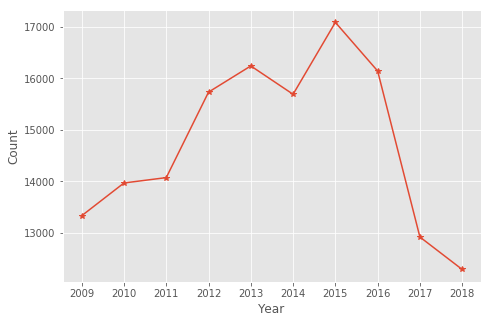

In [21]:
year_count = df_train.groupby(['year'])['year'].count()
years = year_count.index
count_values = year_count.values

plt.rcParams['figure.figsize'] = [7.5, 5]
plt.plot(years, count_values, marker='*')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()